In [1]:
import opendatasets as od

In [2]:
#od.download('https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia')

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory('chest-xray-pneumonia/chest_xray/chest_xray/train', target_size=(224,224), color_mode='grayscale', batch_size=32, class_mode='binary')
val_data   = val_datagen.flow_from_directory('chest-xray-pneumonia/chest_xray/chest_xray/val', target_size=(224,224), color_mode='grayscale', batch_size=32, class_mode='binary')
test_data  = test_datagen.flow_from_directory('chest-xray-pneumonia/chest_xray/chest_xray/test', target_size=(224,224), color_mode='grayscale', batch_size=32, class_mode='binary')


2025-07-06 08:38:42.815826: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-06 08:38:42.822628: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-06 08:38:42.830778: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-06 08:38:42.842526: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751791122.862914    7785 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751791122.87

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 625 images belonging to 2 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(224, 224, 1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

2025-07-06 08:38:47.603445: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
import time

start_time = time.time()

history = model.fit(train_data, validation_data=val_data, epochs=5)

end_time = time.time()

print(f"\n⏱️ Total Training Time: {end_time - start_time:.2f} seconds")
print(f"⏱️ Average Time per Epoch: {(end_time - start_time)/5:.2f} seconds")

/opt/conda/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 100s 597ms/step - accuracy: 0.8298 - loss: 0.5125 - val_accuracy: 0.9375 - val_loss: 0.2082
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 95s 584ms/step - accuracy: 0.9583 - loss: 0.1039 - val_accuracy: 0.6875 - val_loss: 0.7787
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 94s 574ms/step - accuracy: 0.9736 - loss: 0.0689 - val_accuracy: 0.8125 - val_loss: 0.3291
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 97s 592ms/step - accuracy: 0.9833 - loss: 0.0491 - val_accuracy: 0.8750 - val_loss: 0.2111
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 93s 571ms/step - accuracy: 0.9869 - loss: 0.0411 - val_accuracy: 0.8125 - val_loss: 0.6075

⏱️ Total Training Time: 479.97 seconds
⏱️ Average Time per Epoch: 95.99 seconds


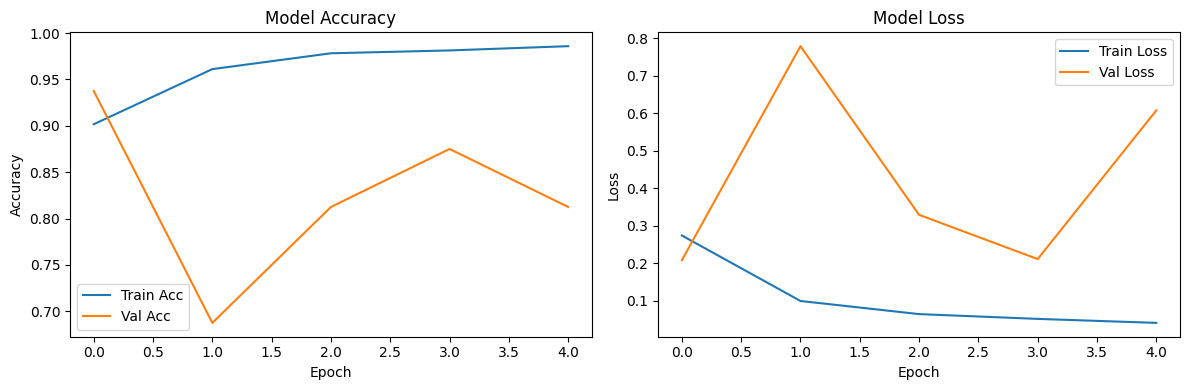

In [6]:
import matplotlib.pyplot as plt

history = model.history.history

plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Acc')
plt.plot(history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.4f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 191ms/step - accuracy: 0.7167 - loss: 1.7269
Test Accuracy: 0.73, Test Loss: 1.5470


In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get ground truth and predictions
y_true = test_data.classes
y_pred_probs = model.predict(test_data)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=test_data.class_indices.keys()))


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step
[[ 26 209]
 [ 46 344]]
              precision    recall  f1-score   support

      NORMAL       0.36      0.11      0.17       235
   PNEUMONIA       0.62      0.88      0.73       390

    accuracy                           0.59       625
   macro avg       0.49      0.50      0.45       625
weighted avg       0.52      0.59      0.52       625



In [9]:
import time
start = time.time()
model.evaluate(test_data)
print("Evaluation Time:", round(time.time() - start, 2), "seconds")

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - accuracy: 0.7389 - loss: 1.4010
Evaluation Time: 4.38 seconds
